#### 【 지도학습 - 회귀 】
- 회귀(Regression) : 수치값을 예측하는 학습
    * 예: 거리, 시간, 무게, 집가격 등등 ...

- 주제 : 생선 길이에 따른 무게를 예측하는 모델
- 방법 : 최근접이웃 알고리즘을 사용


[1] 모듈 로딩 <hr>

In [95]:
## ========================================================
## [1-1] 모듈 로딩
## ========================================================
## 기본 모듈
import pandas as pd
import numpy as np

## 시각화 모듈
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 데이터셋 및 학습관련 모듈
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

## CoW 활성화 : 복사와 공유 자동 설정 기능 활성화
pd.options.mode.copy_on_write = True

# 판다스/넘파이에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)


In [96]:
## ========================================================
## [1-2] 데이터 준비 및 확인
## ========================================================
## 데이터 준비
DATA_FILE = '../DATA/fish_train_10500.csv'

## Bream, Smelt 생선 데이터만 추출
fishDF = pd.read_csv(DATA_FILE, usecols=[0,1,5])

## 방법 1 (=직관적)
# (fishDF.Species == 'Bream') | (fishDF.Species == 'Bream')

## 방법 2 (=편함)
dataDF = fishDF[fishDF.Species.isin(['Bream', 'Smelt'])]
dataDF

,Weight,Length,Species
0,487.42334,32.42375,Bream
1,990.89654,41.36527,Bream
2,627.08172,33.44470,Bream
3,749.38272,35.68641,Bream
4,615.62195,33.52775,Bream
...,...,...,...
10495,7.84624,11.21824,Smelt
10496,14.77972,13.10661,Smelt
10497,13.13453,12.38393,Smelt
10498,8.09812,10.94337,Smelt


        Weight  Length
Weight 1.00000 0.96938
Length 0.96938 1.00000


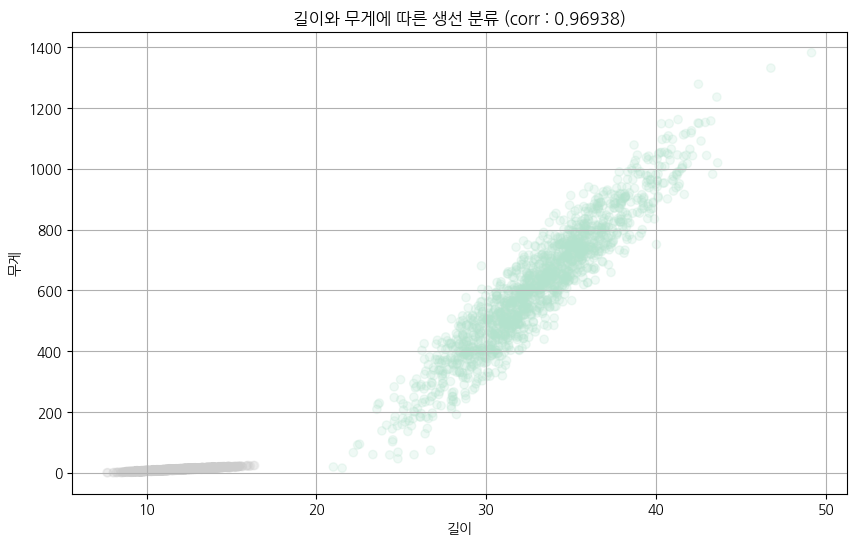

In [97]:
## 길이와 무게, 품종 관계 시각화
dataDF.Species = dataDF.Species.astype('category')
corr_ = dataDF.corr(numeric_only=True)
print(corr_)

plt.figure(figsize=(10,6))
plt.scatter(dataDF['Length'], dataDF['Weight'], c=dataDF.Species.cat.codes, cmap='Pastel2', alpha=0.2)
plt.xlabel('길이')
plt.ylabel('무게')
plt.grid()
plt.title(f'길이와 무게에 따른 생선 분류 (corr : {corr_.loc["Weight","Length"].round(5)})')
plt.show()

[2] 피쳐와 타겟/학습용과 테스트용 분리 <hr>

In [98]:
## [2-1] 피쳐와 타겟 분리
display(dataDF)
featureDF = dataDF[dataDF.columns[1:-1]]        ## feature는 무조건 2차원이라서 슬라이싱으로 빼면 됨 -> dataDF[['Lenght']]
targetSR = dataDF[dataDF.columns[0]]            ## target은 1차원  -> dataDF['Weight']

print(f'featureDF : {featureDF.shape}, targetSR : {targetSR.shape}')

,Weight,Length,Species
0,487.42334,32.42375,Bream
1,990.89654,41.36527,Bream
2,627.08172,33.44470,Bream
3,749.38272,35.68641,Bream
4,615.62195,33.52775,Bream
...,...,...,...
10495,7.84624,11.21824,Smelt
10496,14.77972,13.10661,Smelt
10497,13.13453,12.38393,Smelt
10498,8.09812,10.94337,Smelt


featureDF : (3000, 1), targetSR : (3000,)


In [99]:
## [2-2] 학습용과 테스트용 분리 : 회귀 시에는 stratify 필요없음
##                             분류 시에는 클래스/라벨별 비율 설정을 위해서 stratify 필요 !!
##                             회귀는 무게값이 다 다른데 종류별로 비율을 설정할 수 없어서, 설정안됨
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                    test_size=0.2,
                                                    random_state=10)    

print(f'[Train] x_train : {x_train.shape}, y_train : {y_train.shape}')
print(f'[Test] x_test : {x_test.shape}, y_test : {y_test.shape}')

[Train] x_train : (2400, 1), y_train : (2400,)
[Test] x_test : (600, 1), y_test : (600,)


[3] 학습 진행 <hr>

In [100]:
## 모델 인스턴스 생성
kModel = KNeighborsRegressor()
kModel

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [101]:
## 학습 진행 => 학습용 데이터셋만 사용
kModel.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [102]:
## 학습 후 학습용데이터셋 기반 모델 파라미터 설정
## - 모델 파라미터 : 파라미터이름_
print('n_features_in_     :',kModel.n_features_in_)
print('feature_names_in_  :',kModel.feature_names_in_)
print('n_samples_fit_     :',kModel.n_samples_fit_)

n_features_in_     : 1
feature_names_in_  : ['Length']
n_samples_fit_     : 2400


[4] 성능평가 <hr>

In [103]:
## 훈련용 성능평가 & 테스트용 성능평가 비교
train_score = kModel.score(x_train, y_train)
test_score = kModel.score(x_test, y_test)
print(f'[train_score]: {train_score}')
print(f'[test_score] : {test_score}')

[train_score]: 0.9828286862394048
[test_score] : 0.9776944688636253


[5] 예측 : 새로운 데이터 사용 <hr>
- predict(2D_새로운피쳐) ==> 예측 무게 값
- n_neighbors의 무게를 추출 => 평균한 값과 예측 무게값이 같은지 체크

In [104]:
newDF = pd.DataFrame( [[20],[3],[45]] , columns=dataDF.columns[1:-1])
newDF

,Length
0,20
1,3
2,45


In [118]:
## 예측값 추출
pre_weight = kModel.predict(newDF)

## n_neighbors 찾기
dis_, indices = kModel.kneighbors(newDF) ## 이웃의 거리 + 이웃의 인덱스들을 반환

n_idx = indices[0].tolist()
display(indices)

array([[1181, 1139,   12, 1550, 1125],
       [ 203, 1136,  966, 1373, 1749],
       [1715, 1405, 1796,  360,  664]])

In [117]:
print(x_train.iloc[[0,1]], end='\n\n')          ## DF => 위치인덱스
print(y_train.loc[[10092,87]], end='\n\n')      ## DF => 라벨인덱스
print(y_train[[10092,87]])
print('-----------------------------------------------------------------------------')
print('x_train.index', x_train.index,sep='\n')
print('y_train.index', y_train.index,sep='\n')

        Length
10092  9.83350
87    37.24850

10092     2.60215
87      733.44622
Name: Weight, dtype: float64

10092     2.60215
87      733.44622
Name: Weight, dtype: float64
-----------------------------------------------------------------------------
x_train.index
Index([10092,    87,   729,  1065,  9498,   599,  9979,  9423,  9281, 10456,
       ...
        1032,  9542,  9449,  9020,   733,  9509,  1180,  1344,   527,  1289],
      dtype='int64', length=2400)
y_train.index
Index([10092,    87,   729,  1065,  9498,   599,  9979,  9423,  9281, 10456,
       ...
        1032,  9542,  9449,  9020,   733,  9509,  1180,  1344,   527,  1289],
      dtype='int64', length=2400)


In [135]:
display(x_train)

,Length
10092,9.83350
87,37.24850
729,30.87698
1065,38.12796
9498,11.86173
...,...
9509,13.33374
1180,37.07403
1344,36.68896
527,35.63784


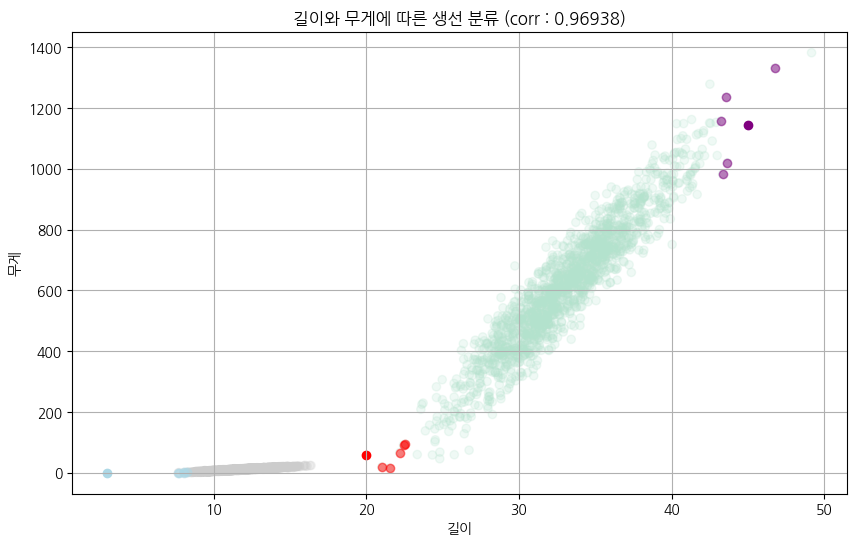

In [168]:
## 길이와 무게, 품종 관계 시각화
plt.figure(figsize=(10,6))
## 기존 데이터
plt.scatter(dataDF['Length'], dataDF['Weight'], c=dataDF.Species.cat.codes, cmap='Pastel2', alpha=0.2)

## 새로운 데이터 [ 20 ] => 예측 무게 [0]
## 친구들 보기
c_k = ['r','lightblue','purple']
for k in range(newDF.shape[0]):
    plt.scatter(newDF.iloc[k], pre_weight[k], c=c_k[k])
    for i in indices[k]:
        plt.scatter(x_train.iloc[i],y_train.iloc[i], c=c_k[k], alpha=0.5)



plt.xlabel('길이')
plt.ylabel('무게')
plt.grid()
plt.title(f'길이와 무게에 따른 생선 분류 (corr : {corr_.loc["Weight","Length"].round(5)})')
plt.show()

In [159]:
print(indices[0])
dataDF.info()
display(dataDF)
## 실제 weight의 값
r_weight = []
for k in range(3):
    pre_list = []
    for i in indices[k].tolist():
        pre_list.append(y_train.iloc[i])
    print(pre_list)
    r_weight.append(np.mean(pre_list))

display(pre_weight, r_weight)

[1181 1139   12 1550 1125]
<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 10499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Weight   3000 non-null   float64 
 1   Length   3000 non-null   float64 
 2   Species  3000 non-null   category
dtypes: category(1), float64(2)
memory usage: 137.9 KB


,Weight,Length,Species
0,487.42334,32.42375,Bream
1,990.89654,41.36527,Bream
2,627.08172,33.44470,Bream
3,749.38272,35.68641,Bream
4,615.62195,33.52775,Bream
...,...,...,...
10495,7.84624,11.21824,Smelt
10496,14.77972,13.10661,Smelt
10497,13.13453,12.38393,Smelt
10498,8.09812,10.94337,Smelt


[np.float64(18.924735229509068), np.float64(15.177656400483476), np.float64(66.24614351176187), np.float64(91.15177852593534), np.float64(94.0513537748533)]
[np.float64(0.0753659496177919), np.float64(0.1836847965712242), np.float64(0.0229469203671982), np.float64(0.8070714438630227), np.float64(1.055277141737669)]
[np.float64(1019.8428452519306), np.float64(1236.0743262503695), np.float64(982.3421168091328), np.float64(1157.6904484123506), np.float64(1331.5087584846228)]


array([  57.110333,    0.428869, 1145.491699])

[np.float64(57.1103334885086),
 np.float64(0.42886925043138113),
 np.float64(1145.4916990416812)]